## Visualizing Filter Patterns
Code influencecd by https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

In [21]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 32
epochs = 10

train_data_dir = './datasets/catsvsdogs/train'
validation_data_dir = './datasets/catsvsdogs/validation'

# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        rotation_range = 30,
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_17 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 72, 72, 32)        0         
__________________________________________________________

In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
62/62 [==============================] - 43s 687ms/step - loss: 0.7831 - acc: 0.4980 - val_loss: 0.6932 - val_acc: 0.4990
Epoch 2/10
62/62 [==============================] - 40s 641ms/step - loss: 0.6891 - acc: 0.5675 - val_loss: 0.6907 - val_acc: 0.5692
Epoch 3/10
62/62 [==============================] - 36s 587ms/step - loss: 0.6927 - acc: 0.5635 - val_loss: 0.6904 - val_acc: 0.5196
Epoch 4/10
62/62 [==============================] - 35s 571ms/step - loss: 0.6703 - acc: 0.5857 - val_loss: 0.6634 - val_acc: 0.6229
Epoch 5/10
62/62 [==============================] - 36s 575ms/step - loss: 0.6579 - acc: 0.6361 - val_loss: 0.6629 - val_acc: 0.5692
Epoch 6/10
62/62 [==============================] - 36s 581ms/step - loss: 0.6452 - acc: 0.6230 - val_loss: 0.6636 - val_acc: 0.5661
Epoch 7/10
62/62 [==============================] - 34s 550ms/step - loss: 0.6404 - acc: 0.6472 - val_loss: 0.6353 - val_acc: 0.6136
Epoch 8/10
62/62 [==============================] - 34s 543ms/step - 

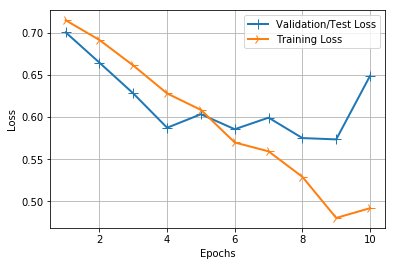

In [18]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

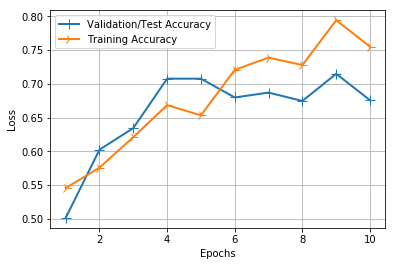

In [19]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
model.save("/home/deeplearningcv/DeepLearningCV/Trained Models/cats_vs_dogs_dataugment_working.h5")

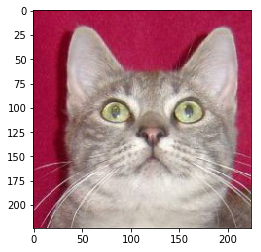

In [41]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

input_image_path = './datasets/catsvsdogs/validation/cats/cat074.jpg'

# Show our input Image for Feature visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);

img_size = (150, 150)
# load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)

## Creating a model from an input tensor and list of output tensors

To extract feature maps we create a Keras model that takes batches of images as input and outputs the activations of all convolution and pooling layers. 

In [50]:
from keras import models

# Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Run our image through our model's prediction function

In [51]:
activations = activation_model.predict(image_tensor)

In [52]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


### Let's take a look at the first channel

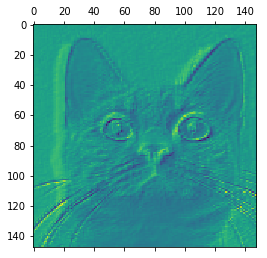

In [53]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

### Now let's look at the 7th Channel

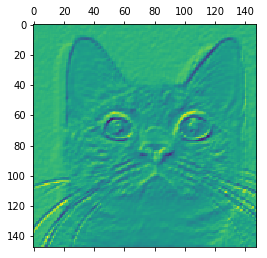

In [55]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

### Let's plot all 32

/home/deeplearningcv/anaconda3/envs/cv/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


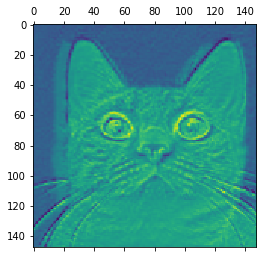

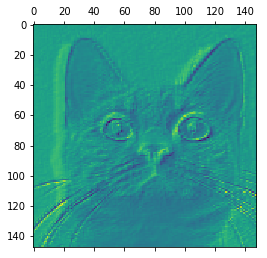

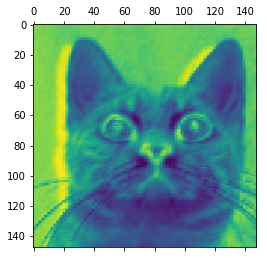

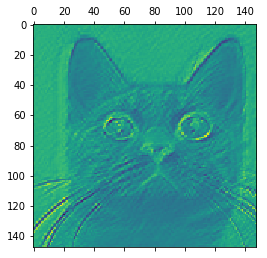

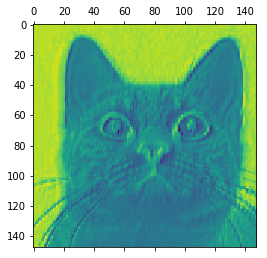

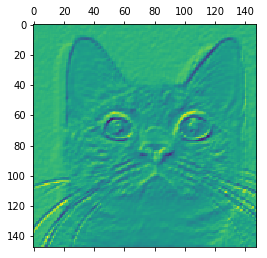

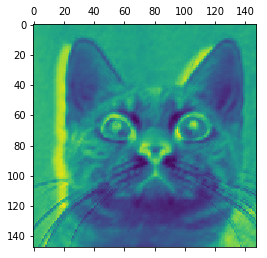

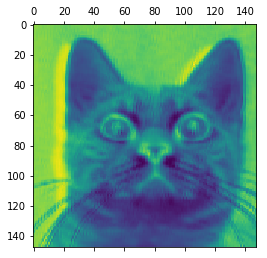

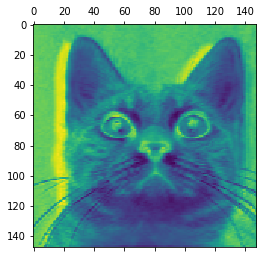

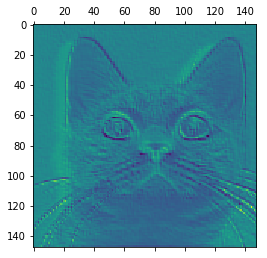

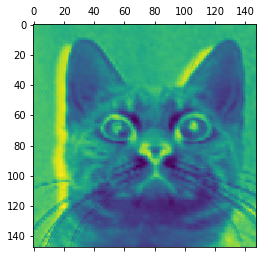

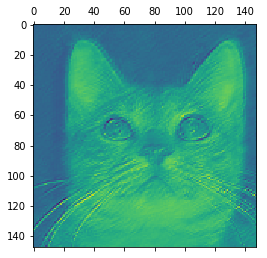

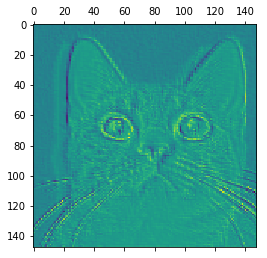

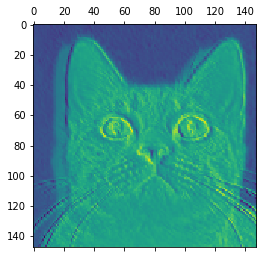

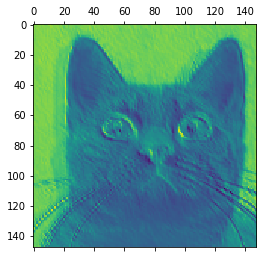

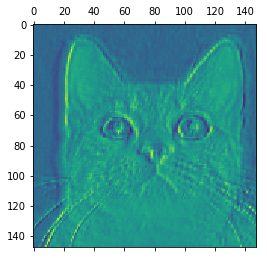

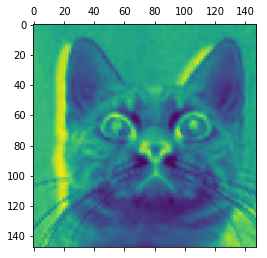

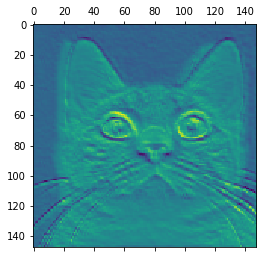

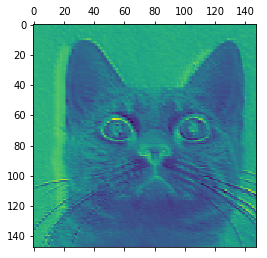

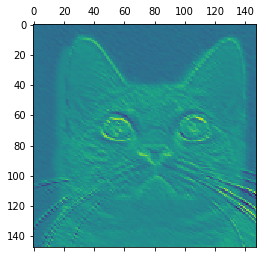

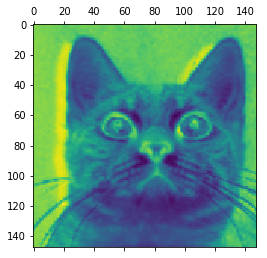

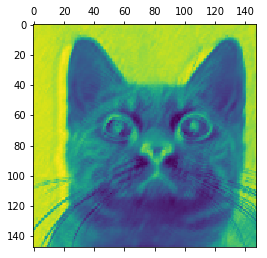

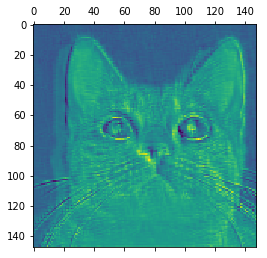

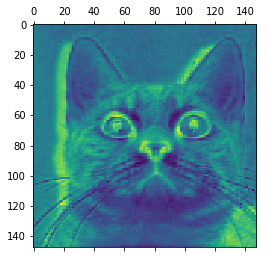

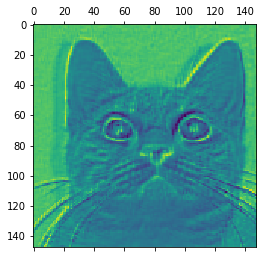

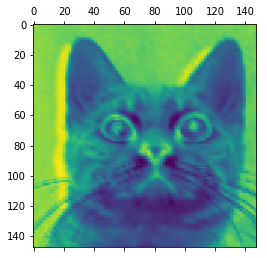

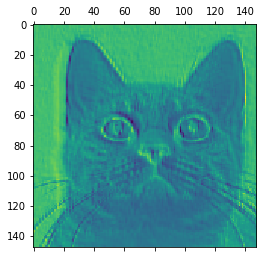

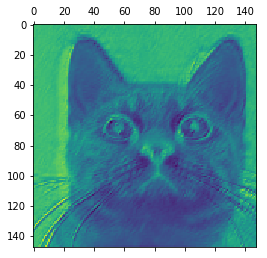

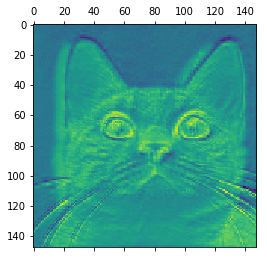

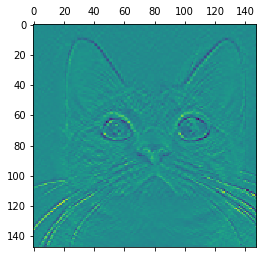

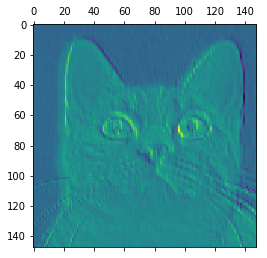

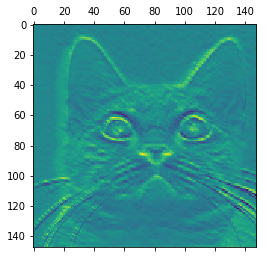

In [48]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0, :, :,i], cmap='viridis')

## Visualizing every layer activation

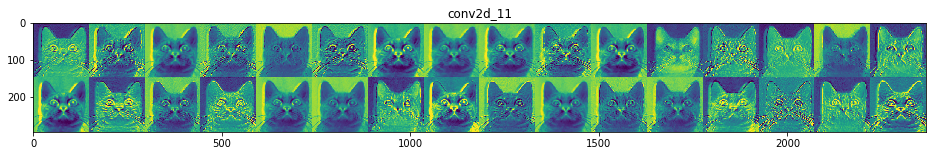

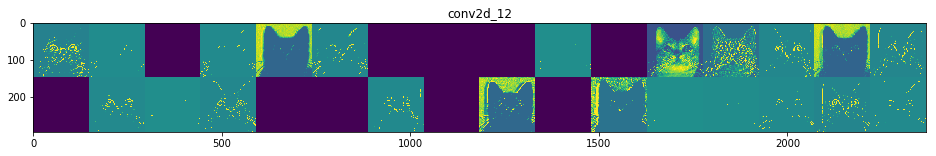

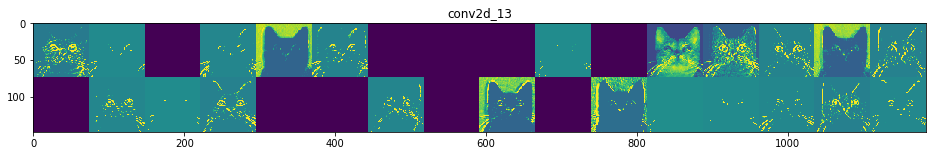

In [61]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 16

# Get CONV layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Obersavations
   
- You an see that the first layers act mainly as different types of edge detectors and activations retain most of the input image.

- As we go higher up the network to the 2nd and 3rd  layers we can see the activations become more abstract and harder to interpret visually. But you may notice they retain high level visual concepts such as the cat eyes or outline or even cat ears.

- Many blank activations in the later deeper stages, this means that pattern encoded by those filters were not activated by the input image.
